<a href="https://colab.research.google.com/github/anubhawbhalotia/Machine-Learning-by-Stanford-University/blob/master/Programming_Ex_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Programming Ex 2**

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

path = 'ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Text(0, 0.5, 'Exam 2 Score')

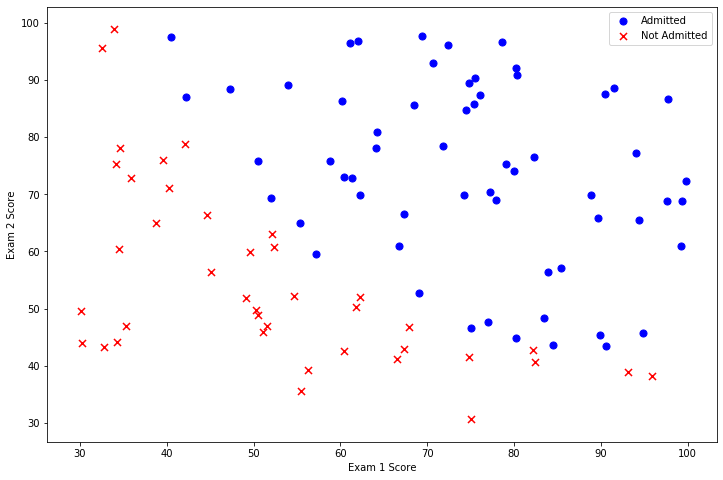

In [13]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

In [14]:
def sigmoid(z):
    return  1 / (1 + np.exp(-z))

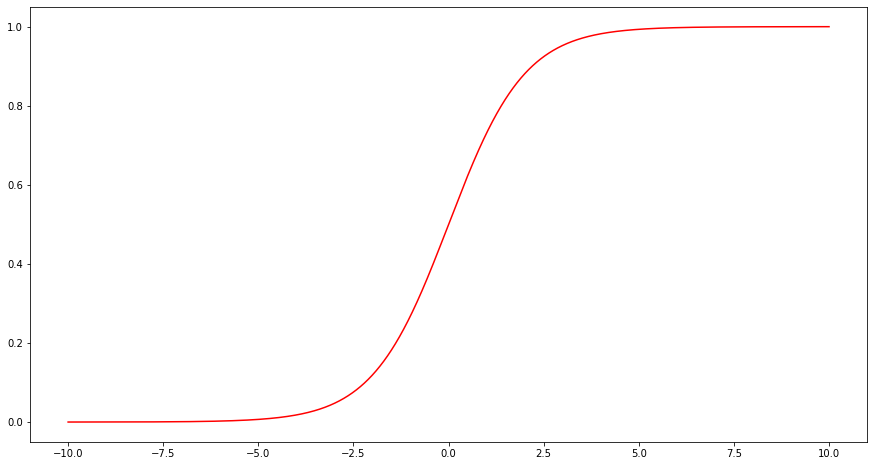

In [15]:
nums = np.arange(-10, 10, step=.000001)

fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(nums, sigmoid(nums), 'r')

In [16]:
def cost(theta, X, y):
    theta = np.reshape(theta, (1, -1))
    first = np.multiply(-y, np.log(sigmoid(np.matmul(X, theta.T))))
    second = np.multiply((1 - y), np.log(1 - sigmoid(np.matmul(X, theta.T))))
    return np.sum(first - second) / (len(X))

In [17]:
# add a ones column - this makes the matrix multiplication work out easier
data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:, cols-1:cols]

# convert to numpy arrays and initialize the parameter array theta
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

In [18]:
X.shape, theta.shape, y.shape

((100, 3), (3,), (100, 1))

In [19]:
cost(theta, X, y)

0.6931471805599453

In [20]:
def gradient(theta, X, y):
    theta = np.reshape(theta, (1, -1))
    parameters = theta.shape[1]
    grad = np.zeros(parameters)
    error = sigmoid(np.matmul(X, theta.T)) - y
    for i in range(parameters):
        temp = np.reshape(X[:,i], (-1, 1))
        term = np.multiply(error, temp)
        grad[i] = np.sum(term) / X.shape[0]
    return grad

In [21]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
cost(result[0], X, y)

0.20349770158947444